In [20]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)

In [21]:
x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))

y[x[:,0] * x[:,1]<0] = 0
n_train = 100

x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :],dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

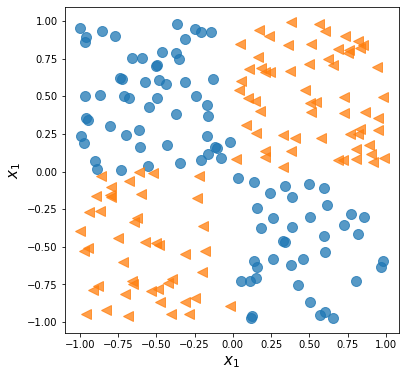

In [23]:
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0,0],x[y==0,1],'o', alpha=0.75, markersize=10)
plt.plot(x[y==1,0],x[y==1,1],'<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$x_1$',size=15)
plt.show()

In [43]:
model = nn.Sequential(
nn.Linear(2,1),
nn.Sigmoid())

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [58]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

num_epochs = 1

def train(model, num_epochs, train_dl, x_valid, y_valid):
    
    loss_hist_train = [0]*num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_valid = [0]*num_epochs
    accuracy_hist_valid = [0]*num_epochs
  
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:

            # Generate predictions
            pred = model(x_batch)[:, 0]

            # Calculate Loss
            loss = loss_fn(pred, y_batch)

            # compute gradeints
            loss.backward()

            # update weights & gradients
            optimizer.step()

            # Reset gradients to zero for next epoch
            optimizer.zero_grad()

            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
                    
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:,0]
        loss = loss_fn(pred, y_valid)

        loss_hist_valid[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.mean()

    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [59]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

RuntimeError: The size of tensor a (100) must match the size of tensor b (2) at non-singleton dimension 0